In [1]:
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload

import Detectors.Deep_Learning.AutoEncoders.utils
reload(Detectors.Deep_Learning.AutoEncoders.utils)
from Detectors.Deep_Learning.AutoEncoders.utils import SeqDataset,train_epoch,eval_data,train_model

import flow.visualize.visualize_ring as visualize_ring
reload(visualize_ring)
from flow.visualize.visualize_ring import get_measured_leader,get_rel_dist_to_measured_leader,get_vel_of_measured_leader


import torch
print(torch.__version__)

# Anti-Flow specific functions for  detection:

from Detectors.Deep_Learning.AutoEncoders.utils import sliding_window
from Detectors.Deep_Learning.AutoEncoders.cnn_lstm_ae import CNNRecurrentAutoencoder

import utils
reload(utils)
from utils import Bando_OVM_FTL

import os

print('Libraries loaded.')

1.7.1
Libraries loaded.


In [2]:
import Adversaries.controllers.car_following_adversarial
from Adversaries.controllers.car_following_adversarial import FollowerStopper_Overreact
from Adversaries.controllers.car_following_adversarial import ACC_Benign

In [3]:
#Run with just one class of driver:

reload(utils)

driver_controller_list = []

sim_time = 1000
ring_length = 600

a_mean=0.666
b_mean=21.6
s0_mean=2.21
s1_mean=2.82
Vm_mean=8.94

num_human_drivers = 35


for i in range(num_human_drivers):
    a = a_mean + np.random.normal(0,0.1)
    b = b_mean + np.random.normal(0,0.5)
    s0 = s0_mean + np.random.normal(0,0.2)
    s1 = s1_mean + np.random.normal(0,0.2)
    Vm = Vm_mean + np.random.normal(0,0.5)

    label = 'bando_ftl_ovm_a'+str(np.round(a,2))+'_b'+str(np.round(b,2))+'_s0'+str(np.round(s0,2))+'_s1'+str(np.round(s1,2))+'_Vm'+str(np.round(Vm,2))
    cfm_controller = (Bando_OVM_FTL,{'a':a,'b':b,'s0':s0,'s1':s1,'Vm':Vm,'noise':0.1})
    driver_controller_list.append([label,cfm_controller,1])
    


k_1_mean = 1.5
k_2_mean = 0.2
h_mean = 1.8
V_m_mean = 15.0
d_min_mean = 10.0

for i in range(3):
    k_1 = k_1_mean + np.random.normal(0,0.2)
    k_2 = k_2_mean + np.random.normal(0,0.2)
    h = h_mean + np.random.normal(0,0.2)
    V_m = V_m_mean + np.random.normal(0,1.0)
    d_min = d_min_mean
    
    label = 'ACC_k_1'+str(np.round(k_1,2))+'_k_2'+str(np.round(k_2,2))+'_h'+str(np.round(h,2))+'_V_m'+str(np.round(V_m,2))+'d_m'+str(np.round(d_min,2))
    cfm_controller = (ACC_Benign,{'k_1':k_1,'k_2':k_2,'h':h,'V_m':V_m,'d_min':d_min})
    driver_controller_list.append([label,cfm_controller,1])
    
v_des = 10.0
braking_period = 5.0
braking_rate = -3.0

adversary = (FollowerStopper_Overreact, {'v_des':v_des,
                                        'braking_rate':braking_rate,
                                        'braking_period':braking_period})

label_adv = 'FStop_vd'+str(v_des)+'_bperiod'+str(braking_period)+'_brate'+str(braking_rate)
driver_controller_list.append([label_adv,adversary,1])



v_des = 15.0
braking_period = 3.0
braking_rate = -3.0

adversary = (FollowerStopper_Overreact, {'v_des':v_des,
                                        'braking_rate':braking_rate,
                                        'braking_period':braking_period})

label_adv = 'FStop_vd'+str(v_des)+'_bperiod'+str(braking_period)+'_brate'+str(braking_rate)
driver_controller_list.append([label_adv,adversary,1])
    

print('Simulation params initialized.')
# print(driver_controller_list)

Simulation params initialized.


In [4]:
sim_res_list_with_attack = utils.run_ring_sim_variable_cfm(driver_controller_list = driver_controller_list,ring_length = ring_length,sim_time=1000)

Number unique drivers: 40
Error during start: [Errno 2] No such file or directory: '/Users/vanderbilt/Desktop/Research_2022/Anti-Flow/flow/core/kernel/network/debug/cfg/ring_variable_cfm_20220409-1214021649524442.6867998.net.xml'
Retrying in 1 seconds...
Error during start: [Errno 2] No such file or directory: '/Users/vanderbilt/Desktop/Research_2022/Anti-Flow/flow/core/kernel/network/debug/cfg/ring_variable_cfm_20220409-1214021649524442.6867998.net.xml'
Retrying in 1 seconds...
Error during start: [Errno 2] No such file or directory: '/Users/vanderbilt/Desktop/Research_2022/Anti-Flow/flow/core/kernel/network/debug/cfg/ring_variable_cfm_20220409-1214021649524442.6867998.net.xml'
Retrying in 1 seconds...
Error during start: [Errno 2] No such file or directory: '/Users/vanderbilt/Desktop/Research_2022/Anti-Flow/flow/core/kernel/network/debug/cfg/ring_variable_cfm_20220409-1214021649524442.6867998.net.xml'
Retrying in 1 seconds...
Error during start: [Errno 2] No such file or directory: '

TypeError: exceptions must derive from BaseException

In [37]:
#Run with just one class of driver:

reload(utils)

driver_controller_list = []

sim_time = 1000
ring_length = 600

a_mean=0.666
b_mean=21.6
s0_mean=2.21
s1_mean=2.82
Vm_mean=8.94

for i in range(35):
    a = a_mean + np.random.normal(0,0.1)
    b = b_mean + np.random.normal(0,0.5)
    s0 = s0_mean + np.random.normal(0,0.2)
    s1 = s1_mean + np.random.normal(0,0.2)
    Vm = Vm_mean + np.random.normal(0,0.5)

    label = 'bando_ftl_ovm_a'+str(np.round(a,2))+'_b'+str(np.round(b,2))+'_s0'+str(np.round(s0,2))+'_s1'+str(np.round(s1,2))+'_Vm'+str(np.round(Vm,2))
    cfm_controller = (Bando_OVM_FTL,{'a':a,'b':b,'s0':s0,'s1':s1,'Vm':Vm,'noise':0.1})
    driver_controller_list.append([label,cfm_controller,1])


k_1_mean = 0.5
k_2_mean = 0.2
h_mean = 1.8
V_m_mean = 15.0
d_min_mean = 10.0

for i in range(5):
    k_1 = k_1_mean + np.random.normal(0,0.2)
    k_2 = k_2_mean + np.random.normal(0,0.2)
    h = h_mean + np.random.normal(0,0.2)
    V_m = V_m_mean + np.random.normal(0,1.0)
    d_min = d_min_mean
    
    label = 'ACC_k_1'+str(np.round(k_1,2))+'_k_2'+str(np.round(k_2,2))+'_h'+str(np.round(h,2))+'_V_m'+str(np.round(V_m,2))+'d_m'+str(np.round(d_min,2))
    cfm_controller = (ACC_Benign,{'k_1':k_1,'k_2':k_2,'h':h,'V_m':V_m,'d_min':d_min})
    driver_controller_list.append([label,cfm_controller,1])
    
sim_res_list_no_attack = utils.run_ring_sim_variable_cfm(driver_controller_list = driver_controller_list,ring_length = ring_length,sim_time=1000)

Number unique drivers: 40
Running ring simulation, ring length: 600
Round 0, return: 7408.400956994796
data/ring_variable_cfm_20220323-0910031648044603.59619-0_emission.csv data
Average, std returns: 7408.400956994796, 0.0
Average, std velocities: 7.438735867267498, 0.0
Average, std outflows: 0.0, 0.0
Total time: 130.3296399116516
steps/second: 86.43627147142685


In [15]:
reload(Detectors.Deep_Learning.AutoEncoders.utils)
from Detectors.Deep_Learning.AutoEncoders.utils import get_cnn_lstm_ae_model

reload(utils)
from utils import assess_relative_model_on_attack

emission_path = os.path.join(os.getcwd(),sim_res_list_with_attack[1])

GPS_penetration_rate = 0.25

model = get_cnn_lstm_ae_model(n_features=4)
save_path=os.path.join(os.getcwd(),'models/')
MODEL_PATH = os.path.join(save_path,'cnn_lstm_ae_ringlength300_'+str(GPS_penetration_rate)+'percentGPS_relative.pt')
model.load_state_dict(torch.load(MODEL_PATH,map_location=torch.device('cpu')))

<All keys matched successfully>

In [40]:
reload(Detectors.Deep_Learning.AutoEncoders.utils)
reload(utils)
from utils import assess_relative_model_on_attack
import time

num_assess_runs = 10

max_losses_25_percentGPS = []
mean_losses_25_percentGPS = []
classification_labels_25_percentGPS = []

per_sample_time = time.time()

for i in range(num_assess_runs):
    print('Sample number '+str(i))
    smoothed_losses = assess_relative_model_on_attack(emission_path,
                                                      GPS_penetration_rate,
                                                      model,
                                                      want_timeseries_plot=False)
    
    classification_labels = []
    max_losses = []
    mean_losses = []
    for veh_id in smoothed_losses:
        loss = smoothed_losses[veh_id]

        max_loss = np.max(loss)
        mean_loss = np.mean(loss)

        max_losses.append(max_loss)
        mean_losses.append(mean_loss)

        if('FStop' in veh_id):
            classification_labels.append(1)
        else:
            classification_labels.append(0)
            
    max_losses_25_percentGPS.append(max_losses)
    mean_losses_25_percentGPS.append(mean_losses)
    classification_labels_25_percentGPS.append(classification_labels)
    
    print('Sample processing time: '+str(time.time()-per_sample_time))
    per_sample_time = time.time()
    
            
print('Finished processing')
       

Sample number 0
Finding losses on attack simulation.
Data loaded.
Data loaded.
Number of vehicles measured: 10
Vehicles processed: 11

Sample processing time: 75.4226770401001
Sample number 1
Finding losses on attack simulation.
Data loaded.
Data loaded.
Number of vehicles measured: 10
Vehicles processed: 11

Sample processing time: 75.99933195114136
Sample number 2
Finding losses on attack simulation.
Data loaded.
Data loaded.
Number of vehicles measured: 10
Vehicles processed: 12

Sample processing time: 80.81786584854126
Sample number 3
Finding losses on attack simulation.
Data loaded.
Data loaded.
Number of vehicles measured: 10
Vehicles processed: 12

Sample processing time: 80.89838480949402
Sample number 4
Finding losses on attack simulation.
Data loaded.
Data loaded.
Number of vehicles measured: 10
Vehicles processed: 11

Sample processing time: 74.41918516159058
Sample number 5
Finding losses on attack simulation.
Data loaded.
Data loaded.
Number of vehicles measured: 10
Vehic

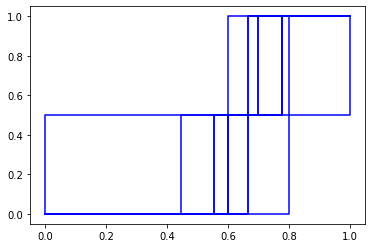

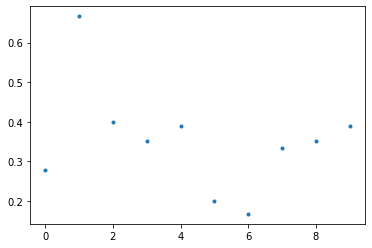

In [43]:
import sklearn
from sklearn import metrics

# y = np.array(classification_labels)
# pred = np.array(max_losses)
# fpr, tpr, thresholds = metrics.roc_curve(y, pred, pos_label=1)

# auc = metrics.auc(fpr, tpr)
# print(auc)

# plt.plot(fpr,tpr,'.-')


auc_vals_max_loss = []
fpr_vals_max_loss = []
tpr_vals_max_loss = []

plt.figure()

for i in range(num_assess_runs):
    max_losses = max_losses_25_percentGPS[i]
    classification_labels = classification_labels_25_percentGPS[i]
    
    y = np.array(classification_labels)
    pred = np.array(max_losses)
    fpr, tpr, thresholds = metrics.roc_curve(y, pred, pos_label=1)

    auc = metrics.auc(fpr, tpr)
    auc_vals_max_loss.append(auc)
    fpr_vals_max_loss.append(fpr)
    tpr_vals_max_loss.append(tpr)
    
    mean_losses = mean_losses_25_percentGPS[i]
    




In [46]:
GPS_penetration_rate = 0.50

model = get_cnn_lstm_ae_model(n_features=4)
save_path=os.path.join(os.getcwd(),'models/')
MODEL_PATH = os.path.join(save_path,'cnn_lstm_ae_ringlength300_'+str(GPS_penetration_rate)+'percentGPS_relative.pt')
model.load_state_dict(torch.load(MODEL_PATH,map_location=torch.device('cpu')))

num_assess_runs = 10

max_losses_50_percentGPS = []
mean_losses_50_percentGPS = []
classification_labels_50_percentGPS = []

per_sample_time = time.time()

for i in range(num_assess_runs):
    print('Sample number '+str(i))
    smoothed_losses = assess_relative_model_on_attack(emission_path,
                                                      GPS_penetration_rate,
                                                      model,
                                                      want_timeseries_plot=False)
    
    classification_labels = []
    max_losses = []
    mean_losses = []
    for veh_id in smoothed_losses:
        loss = smoothed_losses[veh_id]

        max_loss = np.max(loss)
        mean_loss = np.mean(loss)

        max_losses.append(max_loss)
        mean_losses.append(mean_loss)

        if('FStop' in veh_id):
            classification_labels.append(1)
        else:
            classification_labels.append(0)
            
    max_losses_50_percentGPS.append(max_losses)
    mean_losses_50_percentGPS.append(mean_losses)
    classification_labels_50_percentGPS.append(classification_labels)
    
    print('Sample processing time: '+str(time.time()-per_sample_time))
    per_sample_time = time.time()
    
            
print('Finished processing')

Sample number 0
Finding losses on attack simulation.
Data loaded.
Data loaded.
Number of vehicles measured: 20
Vehicles processed: 22

Sample processing time: 135.79864287376404
Sample number 1
Finding losses on attack simulation.
Data loaded.
Data loaded.
Number of vehicles measured: 20
Vehicles processed: 21

Sample processing time: 128.63769030570984
Sample number 2
Finding losses on attack simulation.
Data loaded.
Data loaded.
Number of vehicles measured: 20
Vehicles processed: 21

Sample processing time: 128.86349892616272
Sample number 3
Finding losses on attack simulation.
Data loaded.
Data loaded.
Number of vehicles measured: 20
Vehicles processed: 22

Sample processing time: 134.22874879837036
Sample number 4
Finding losses on attack simulation.
Data loaded.
Data loaded.
Number of vehicles measured: 20
Vehicles processed: 20

Sample processing time: 127.64208483695984
Sample number 5
Finding losses on attack simulation.
Data loaded.
Data loaded.
Number of vehicles measured: 20

In [55]:
GPS_penetration_rate = 0.75

model = get_cnn_lstm_ae_model(n_features=4)
save_path=os.path.join(os.getcwd(),'models/')
MODEL_PATH = os.path.join(save_path,'cnn_lstm_ae_ringlength300_'+str(GPS_penetration_rate)+'percentGPS_relative.pt')
model.load_state_dict(torch.load(MODEL_PATH,map_location=torch.device('cpu')))

num_assess_runs = 10

max_losses_75_percentGPS = []
mean_losses_75_percentGPS = []
classification_labels_75_percentGPS = []

per_sample_time = time.time()

for i in range(num_assess_runs):
    print('Sample number '+str(i))
    smoothed_losses = assess_relative_model_on_attack(emission_path,
                                                      GPS_penetration_rate,
                                                      model,
                                                      want_timeseries_plot=False)
    
    classification_labels = []
    max_losses = []
    mean_losses = []
    for veh_id in smoothed_losses:
        loss = smoothed_losses[veh_id]

        max_loss = np.max(loss)
        mean_loss = np.mean(loss)

        max_losses.append(max_loss)
        mean_losses.append(mean_loss)

        if('FStop' in veh_id):
            classification_labels.append(1)
        else:
            classification_labels.append(0)
            
    max_losses_75_percentGPS.append(max_losses)
    mean_losses_75_percentGPS.append(mean_losses)
    #THIS NEED TO BE CORRECTED
    classification_labels_75_percentGPS.append(classification_labels)
    
    print('Sample processing time: '+str(time.time()-per_sample_time))
    per_sample_time = time.time()
    
            
print('Finished processing')

Sample number 0
Finding losses on attack simulation.
Data loaded.
Data loaded.
Number of vehicles measured: 30
Vehicles processed: 31

Sample processing time: 196.24407577514648
Sample number 1
Finding losses on attack simulation.
Data loaded.
Data loaded.
Number of vehicles measured: 30
Vehicles processed: 31

Sample processing time: 205.47444462776184
Sample number 2
Finding losses on attack simulation.
Data loaded.
Data loaded.
Number of vehicles measured: 30
Vehicles processed: 31

Sample processing time: 215.62525391578674
Sample number 3
Finding losses on attack simulation.
Data loaded.
Data loaded.
Number of vehicles measured: 30
Vehicles processed: 30

Sample processing time: 228.79287695884705
Sample number 4
Finding losses on attack simulation.
Data loaded.
Data loaded.
Number of vehicles measured: 30
Vehicles processed: 30

Sample processing time: 213.0834469795227
Sample number 5
Finding losses on attack simulation.
Data loaded.
Data loaded.
Number of vehicles measured: 30


In [48]:
GPS_penetration_rate = 1.0

model = get_cnn_lstm_ae_model(n_features=4)
save_path=os.path.join(os.getcwd(),'models/')
MODEL_PATH = os.path.join(save_path,'cnn_lstm_ae_ringlength300_'+str(GPS_penetration_rate)+'percentGPS_relative.pt')
model.load_state_dict(torch.load(MODEL_PATH,map_location=torch.device('cpu')))

num_assess_runs = 1 #looks at all vehicles, so only need to do once

max_losses_100_percentGPS = []
mean_losses_100_percentGPS = []
classification_labels_100_percentGPS = []

per_sample_time = time.time()

for i in range(num_assess_runs):
    print('Sample number '+str(i))
    smoothed_losses = assess_relative_model_on_attack(emission_path,
                                                      GPS_penetration_rate,
                                                      model,
                                                      want_timeseries_plot=False)
    
    classification_labels = []
    max_losses = []
    mean_losses = []
    for veh_id in smoothed_losses:
        loss = smoothed_losses[veh_id]

        max_loss = np.max(loss)
        mean_loss = np.mean(loss)

        max_losses.append(max_loss)
        mean_losses.append(mean_loss)

        if('FStop' in veh_id):
            classification_labels.append(1)
        else:
            classification_labels.append(0)
            
    max_losses_100_percentGPS.append(max_losses)
    mean_losses_100_percentGPS.append(mean_losses)
    classification_labels_100_percentGPS.append(classification_labels)
    
    print('Sample processing time: '+str(time.time()-per_sample_time))
    per_sample_time = time.time()
    
            
print('Finished processing')

Sample number 0
Finding losses on attack simulation.
Data loaded.
Data loaded.
Number of vehicles measured: 40
Vehicles processed: 40



NameError: name 'mean_losses_1005_percentGPS' is not defined

In [50]:
max_losses_100_percentGPS = []
mean_losses_100_percentGPS = []
classification_labels_100_percentGPS = []

classification_labels = []
max_losses = []
mean_losses = []
for veh_id in smoothed_losses:
    loss = smoothed_losses[veh_id]

    max_loss = np.max(loss)
    mean_loss = np.mean(loss)

    max_losses.append(max_loss)
    mean_losses.append(mean_loss)

    if('FStop' in veh_id):
        classification_labels.append(1)
    else:
        classification_labels.append(0)

max_losses_100_percentGPS.append(max_losses)
mean_losses_100_percentGPS.append(mean_losses)
classification_labels_100_percentGPS.append(classification_labels)

In [51]:
# Test a detector on a different GPS penetration rate than it is meant to be used on:

GPS_penetration_rate_assumed = 1.0

model = get_cnn_lstm_ae_model(n_features=4)
save_path=os.path.join(os.getcwd(),'models/')
MODEL_PATH = os.path.join(save_path,'cnn_lstm_ae_ringlength300_'+str(GPS_penetration_rate_assumed)+'percentGPS_relative.pt')
model.load_state_dict(torch.load(MODEL_PATH,map_location=torch.device('cpu')))

GPS_penetration_rate = 0.75


smoothed_losses = assess_relative_model_on_attack(emission_path,
                                                  GPS_penetration_rate,
                                                  model,
                                                  want_timeseries_plot=False)


Finding losses on attack simulation.
Data loaded.
Data loaded.
Number of vehicles measured: 30
Vehicles processed: 30



# Cross validate detectors on different performance rates:

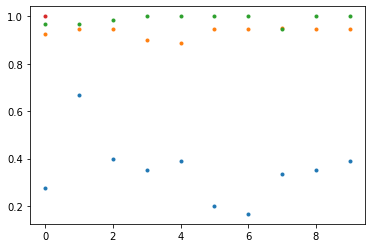

In [75]:
auc_scores_25precentGPS_max = []
auc_scores_25precentGPS_mean = []

for i in range(len(max_losses_25_percentGPS)):
    max_losses = max_losses_25_percentGPS[i]
    classification_labels = classification_labels_25_percentGPS[i]
    
    y = np.array(classification_labels)
    pred = np.array(max_losses)
    fpr, tpr, thresholds = metrics.roc_curve(y, pred, pos_label=1)

    auc = metrics.auc(fpr, tpr)
    auc_scores_25precentGPS_max.append(auc)

auc_scores_50precentGPS_max = []
auc_scores_50precentGPS_mean = []

for i in range(len(max_losses_50_percentGPS)):
    max_losses = max_losses_50_percentGPS[i]
    classification_labels = classification_labels_50_percentGPS[i]
    
    y = np.array(classification_labels)
    pred = np.array(max_losses)
    fpr, tpr, thresholds = metrics.roc_curve(y, pred, pos_label=1)

    auc = metrics.auc(fpr, tpr)
    auc_scores_50precentGPS_max.append(auc)    

auc_scores_75precentGPS_max = []
auc_scores_75precentGPS_mean = []

for i in range(len(max_losses_75_percentGPS)):
    max_losses = max_losses_75_percentGPS[i]
    classification_labels = classification_labels_75_percentGPS[i]
    
    y = np.array(classification_labels)
    pred = np.array(max_losses)
    fpr, tpr, thresholds = metrics.roc_curve(y, pred, pos_label=1)

    auc = metrics.auc(fpr, tpr)
    auc_scores_75precentGPS_max.append(auc)

auc_scores_100precentGPS_max = []
auc_scores_100precentGPS_mean = []

for i in range(len(max_losses_100_percentGPS)):
    max_losses = max_losses_100_percentGPS[i]
    classification_labels = classification_labels_100_percentGPS[i]
    
    y = np.array(classification_labels)
    pred = np.array(max_losses)
    fpr, tpr, thresholds = metrics.roc_curve(y, pred, pos_label=1)

    auc = metrics.auc(fpr, tpr)
    auc_scores_100precentGPS_max.append(auc)
    
plt.plot(auc_scores_25precentGPS_max,'.')
plt.plot(auc_scores_50precentGPS_max,'.')    
plt.plot(auc_scores_75precentGPS_max,'.')    
plt.plot(auc_scores_100precentGPS_max,'.')

# Use k-means to classify max losses:

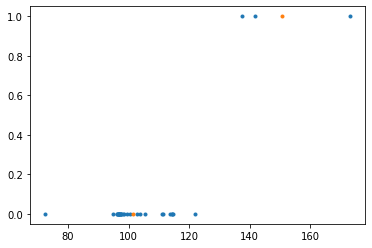

In [98]:
from sklearn.cluster import KMeans


X = max_losses_75_percentGPS[2]
X = np.array(X)

kmeans = KMeans(n_clusters=2, random_state=0).fit(X.reshape(-1,1))
labels = kmeans.labels_

plt.plot(X,labels,'.')
plt.plot(kmeans.cluster_centers_,[0,1],'.')




# # >>> X = np.array([[1, 2], [1, 4], [1, 0],
# # ...               [10, 2], [10, 4], [10, 0]])
# >>> kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
# >>> kmeans.labels_
# array([1, 1, 1, 0, 0, 0], dtype=int32)
# >>> kmeans.predict([[0, 0], [12, 3]])
# array([1, 0], dtype=int32)
# >>> kmeans.cluster_centers_
# array([[10.,  2.],
#        [ 1.,  2.]])

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 8 Text yticklabel objects>)

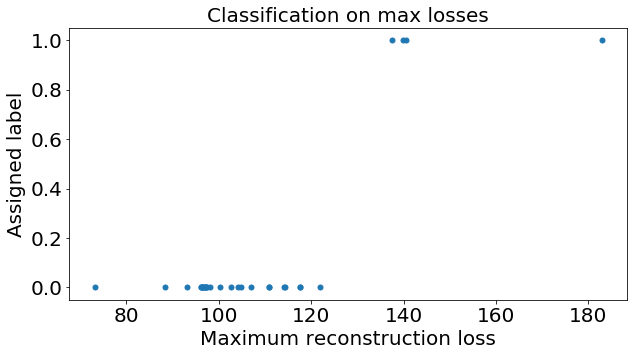

In [156]:
def k_means_cluster(max_losses,cluster_diff=0.1):

    min_l = np.min(max_losses)
    max_l = np.max(max_losses)
    normalize_losses = (max_losses-min_l)/(max_l-min_l)
    X = normalize_losses
    kmeans = KMeans(n_clusters=2, random_state=0).fit(X.reshape(-1,1))
    labels = kmeans.labels_
    cluster_centroids = kmeans.cluster_centers_

    positive_labels = []
    negative_labels = []

    for i in range(len(X)):
        l = X[i]
        label = labels[i]
        if(label==0):negative_labels.append(l)
        else:positive_labels.append(l) 

    if(np.min(positive_labels)-cluster_diff > np.max(negative_labels)):
        return labels,cluster_centroids
    else:
        return np.zeros_like(labels)
    
    
max_losses = max_losses_75_percentGPS[1]
cluster_diff = 0.1
labels,cluster_centroids = k_means_cluster(max_losses,cluster_diff=cluster_diff)

cluster_centroids = cluster_centroids*(np.max(max_losses)-np.min(max_losses))
cluster_centroids = cluster_centroids+np.max(max_losses)

fontsize=20
plt.figure(figsize=[10,5])
plt.plot(max_losses,labels,'.',markersize=10,label='Testing samples')
# plt.plot(cluster_centroids,[0,1],'*',markersize=10,label='Cluster centroids')
plt.ylabel('Assigned label',fontsize=fontsize)
plt.xlabel('Maximum reconstruction loss',fontsize=fontsize)
plt.title('Classification on max losses',fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)

Text(0.5, 0, 'Maximum reconstruction loss')

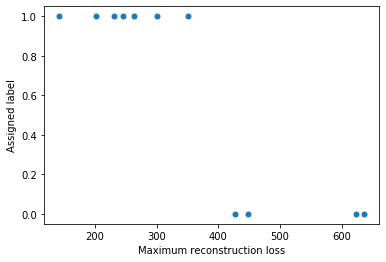

In [148]:

max_losses = max_losses_25_percentGPS[0]
cluster_diff = 0.1

min_l = np.min(max_losses)
max_l = np.max(max_losses)
normalize_losses = (max_losses-min_l)/(max_l-min_l)
X = normalize_losses
kmeans = KMeans(n_clusters=2, random_state=0).fit(X.reshape(-1,1))
labels = kmeans.labels_

positive_labels = []
negative_labels = []

for i in range(len(X)):
    l = X[i]
    label = labels[i]
    if(label==0):negative_labels.append(l)
    else:positive_labels.append(l) 

# if(np.min(positive_labels)-cluster_diff > np.max(negative_labels)):
#     return labels
# else:
#     return np.zeros_like(labels)


plt.plot(max_losses,labels,'.',markersize=10)
plt.ylabel('Assigned label')
plt.xlabel('Maximum reconstruction loss')

In [126]:
TP_list = []
FP_list = []
TN_list = []
FN_list = []

In [127]:
cluster_diff = 0.1

classification_labels_anom_detect = []

for i in range(len(max_losses_25_percentGPS)):
    max_losses = max_losses_25_percentGPS[i]
    kmeans_classification_labels = k_means_cluster(max_losses,cluster_diff=cluster_diff)
    classification_labels_anom_detect.append(kmeans_classification_labels)
    
#get accuracy, recall, and precision:
TP_vals = []
TN_vals = []
FP_vals = []
FN_vals = []

for i in range(len(classification_labels_anom_detect)):
    classification_labels_true = classification_labels_25_percentGPS[i]
    classification_labels_assigned = classification_labels_anom_detect[i]
    
    TP = 0
    TN = 0
    FN = 0
    FP = 0
    
    for j in range(len(classification_labels_true)):
        label_true = classification_labels_true[j]
        label_assigned = classification_labels_assigned[j]
        if(label_true==1 and label_assigned==1):
            TP+=1
        elif(label_true==0 and label_assigned==0):
            TN+=1
        elif(label_true==0 and label_assigned==1):
            FP+=1   
        elif(label_true==1 and label_assigned==0):
            FN+=1
        
    TP_vals.append(TP)
    FP_vals.append(FP)
    FN_vals.append(FN)
    TN_vals.append(TN)
    
TN_vals = np.array(TN_vals)
TP_vals = np.array(TP_vals)
FN_vals = np.array(FN_vals)
FP_vals = np.array(FP_vals)

TN_vals_total = np.sum(TN_vals)
TP_vals_total = np.sum(TP_vals)
FP_vals_total = np.sum(FP_vals)
FN_vals_total = np.sum(FN_vals)


print(TN_vals_total)
print(TP_vals_total)
print(FP_vals_total)
print(FN_vals_total)

TP_list.append(TP_vals_total)
FP_list.append(FP_vals_total)
TN_list.append(TN_vals_total)
FN_list.append(FN_vals_total)

# accuracy_vals = np.divide(TN_vals + TP_vals,TN_vals + TP_vals + FP_vals + FN_vals)
# precision_vals = np.divide(TP_vals,TP_vals + FP_vals)
# recall_vals = np.divide(TP_vals,TP_vals + FN_vals)

# plt.figure()
# plt.plot(accuracy_vals,label='accuracy')
# plt.plot(precision_vals,label='precision')
# plt.plot(recall_vals,label='recall')
# plt.legend()



# plt.subplot(4,1,1)
# plt.plot(TN_vals_total,label='TN')
# plt.legend()
# plt.subplot(4,1,2)
# plt.plot(TP_vals_total,label='TP')
# plt.legend()
# plt.subplot(4,1,3)
# plt.plot(FP_vals_total,label='FP')
# plt.legend()
# plt.subplot(4,1,4)
# plt.plot(FN_vals_total,label='FN')

# accuracy = []
# precision = []
# recall = []

82
1
12
19


In [128]:
cluster_diff = 0.1

classification_labels_anom_detect = []

for i in range(len(max_losses_50_percentGPS)):
    max_losses = max_losses_50_percentGPS[i]
    kmeans_classification_labels = k_means_cluster(max_losses,cluster_diff=cluster_diff)
    classification_labels_anom_detect.append(kmeans_classification_labels)
    
#get accuracy, recall, and precision:
TP_vals = []
TN_vals = []
FP_vals = []
FN_vals = []

for i in range(len(classification_labels_anom_detect)):
    classification_labels_true = classification_labels_50_percentGPS[i]
    classification_labels_assigned = classification_labels_anom_detect[i]
    
    TP = 0
    TN = 0
    FN = 0
    FP = 0
    
    for j in range(len(classification_labels_true)):
        label_true = classification_labels_true[j]
        label_assigned = classification_labels_assigned[j]
        if(label_true==1 and label_assigned==1):
            TP+=1
        elif(label_true==0 and label_assigned==0):
            TN+=1
        elif(label_true==0 and label_assigned==1):
            FP+=1   
        elif(label_true==1 and label_assigned==0):
            FN+=1
        
    TP_vals.append(TP)
    FP_vals.append(FP)
    FN_vals.append(FN)
    TN_vals.append(TN)
    
TN_vals = np.array(TN_vals)
TP_vals = np.array(TP_vals)
FN_vals = np.array(FN_vals)
FP_vals = np.array(FP_vals)

TN_vals_total = np.sum(TN_vals)
TP_vals_total = np.sum(TP_vals)
FP_vals_total = np.sum(FP_vals)
FN_vals_total = np.sum(FN_vals)


print(TN_vals_total)
print(TP_vals_total)
print(FP_vals_total)
print(FN_vals_total)

TP_list.append(TP_vals_total)
FP_list.append(FP_vals_total)
TN_list.append(TN_vals_total)
FN_list.append(FN_vals_total)

168
4
24
16


In [129]:
cluster_diff = 0.1

classification_labels_anom_detect = []

for i in range(len(max_losses_75_percentGPS)):
    max_losses = max_losses_75_percentGPS[i]
    kmeans_classification_labels = k_means_cluster(max_losses,cluster_diff=cluster_diff)
    classification_labels_anom_detect.append(kmeans_classification_labels)
    
#get accuracy, recall, and precision:
TP_vals = []
TN_vals = []
FP_vals = []
FN_vals = []

for i in range(len(classification_labels_anom_detect)):
    classification_labels_true = classification_labels_75_percentGPS[i]
    classification_labels_assigned = classification_labels_anom_detect[i]
    
    TP = 0
    TN = 0
    FN = 0
    FP = 0
    
    for j in range(len(classification_labels_true)):
        label_true = classification_labels_true[j]
        label_assigned = classification_labels_assigned[j]
        if(label_true==1 and label_assigned==1):
            TP+=1
        elif(label_true==0 and label_assigned==0):
            TN+=1
        elif(label_true==0 and label_assigned==1):
            FP+=1   
        elif(label_true==1 and label_assigned==0):
            FN+=1
        
    TP_vals.append(TP)
    FP_vals.append(FP)
    FN_vals.append(FN)
    TN_vals.append(TN)
    
TN_vals = np.array(TN_vals)
TP_vals = np.array(TP_vals)
FN_vals = np.array(FN_vals)
FP_vals = np.array(FP_vals)

TN_vals_total = np.sum(TN_vals)
TP_vals_total = np.sum(TP_vals)
FP_vals_total = np.sum(FP_vals)
FN_vals_total = np.sum(FN_vals)


print(TN_vals_total)
print(TP_vals_total)
print(FP_vals_total)
print(FN_vals_total)

TP_list.append(TP_vals_total)
FP_list.append(FP_vals_total)
TN_list.append(TN_vals_total)
FN_list.append(FN_vals_total)

277
17
10
3


In [130]:
cluster_diff = 0.1

classification_labels_anom_detect = []

for i in range(len(max_losses_100_percentGPS)):
    max_losses = max_losses_100_percentGPS[i]
    kmeans_classification_labels = k_means_cluster(max_losses,cluster_diff=cluster_diff)
    classification_labels_anom_detect.append(kmeans_classification_labels)
    
#get accuracy, recall, and precision:
TP_vals = []
TN_vals = []
FP_vals = []
FN_vals = []

for i in range(len(classification_labels_anom_detect)):
    classification_labels_true = classification_labels_100_percentGPS[i]
    classification_labels_assigned = classification_labels_anom_detect[i]
    
    TP = 0
    TN = 0
    FN = 0
    FP = 0
    
    for j in range(len(classification_labels_true)):
        label_true = classification_labels_true[j]
        label_assigned = classification_labels_assigned[j]
        if(label_true==1 and label_assigned==1):
            TP+=1
        elif(label_true==0 and label_assigned==0):
            TN+=1
        elif(label_true==0 and label_assigned==1):
            FP+=1   
        elif(label_true==1 and label_assigned==0):
            FN+=1
        
    TP_vals.append(TP)
    FP_vals.append(FP)
    FN_vals.append(FN)
    TN_vals.append(TN)
    
TN_vals = np.array(TN_vals)
TP_vals = np.array(TP_vals)
FN_vals = np.array(FN_vals)
FP_vals = np.array(FP_vals)

TN_vals_total = np.sum(TN_vals)
TP_vals_total = np.sum(TP_vals)
FP_vals_total = np.sum(FP_vals)
FN_vals_total = np.sum(FN_vals)


print(TN_vals_total)
print(TP_vals_total)
print(FP_vals_total)
print(FN_vals_total)

TP_list.append(TP_vals_total)
FP_list.append(FP_vals_total)
TN_list.append(TN_vals_total)
FN_list.append(FN_vals_total)

38
2
0
0


Text(0.5, 1.0, 'Classifier performance across GPS rates')

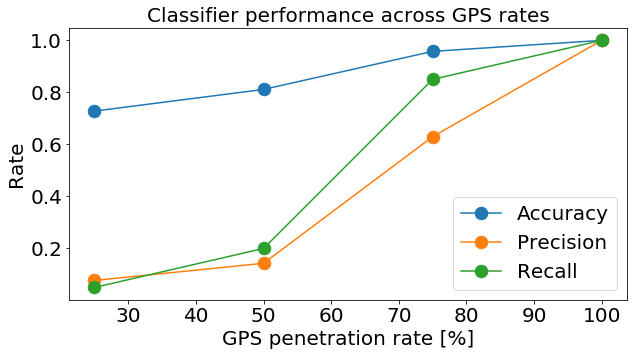

In [144]:
TP_list_nparray = np.array(TP_list)
FP_list_nparray = np.array(FP_list)
TN_list_nparray = np.array(TN_list)
FN_list_nparray = np.array(FN_list)

accuracy_vals = np.divide(TN_list_nparray + TP_list_nparray,TN_list_nparray + TP_list_nparray + FP_list_nparray + FN_list_nparray)
precision_vals = np.divide(TP_list_nparray,TP_list_nparray + FP_list_nparray)
recall_vals = np.divide(TP_list_nparray,TP_list_nparray + FN_list_nparray)

fontsize=20
plt.figure(figsize=[10,5])
plt.plot([25,50,75,100],accuracy_vals,'.-',markersize=25,label='Accuracy')
plt.plot([25,50,75,100],precision_vals,'.-',markersize=25,label='Precision')
plt.plot([25,50,75,100],recall_vals,'.-',markersize=25,label='Recall')
plt.legend(fontsize=fontsize)
plt.ylabel('Rate',fontsize=fontsize)
plt.xlabel('GPS penetration rate [%]',fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.title('Classifier performance across GPS rates',fontsize=fontsize)

# Detailed look at mismatched detectors:

Finding losses on attack simulation.
Data loaded.
Data loaded.
Number of vehicles measured: 30
Vehicles processed: 31



KeyError: None

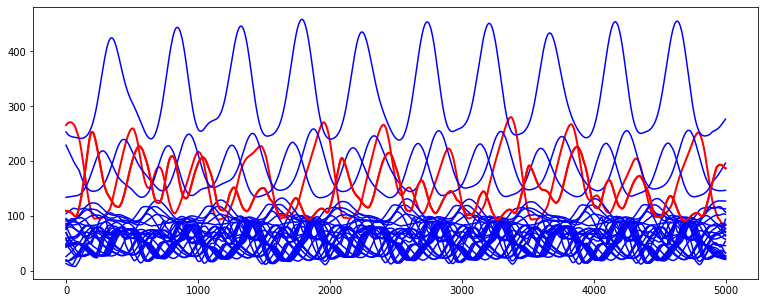

In [62]:
reload(visualize_ring)

GPS_penetration_rate_assumed = 1.0

model = get_cnn_lstm_ae_model(n_features=4)
save_path=os.path.join(os.getcwd(),'models/')
MODEL_PATH = os.path.join(save_path,'cnn_lstm_ae_ringlength300_'+str(GPS_penetration_rate_assumed)+'percentGPS_relative.pt')
model.load_state_dict(torch.load(MODEL_PATH,map_location=torch.device('cpu')))

GPS_penetration_rate = 0.75


smoothed_losses = assess_relative_model_on_attack(emission_path,
                                                  GPS_penetration_rate,
                                                  model,
                                                  want_timeseries_plot=False)

FStop_vd11.0_bperiod3.0_brate-3.0_0
ACC_k_10.84_k_20.78_h1.42_V_m16.09_0


Text(0.5, 1.0, '100% GPS detector on 75% observed traffic')

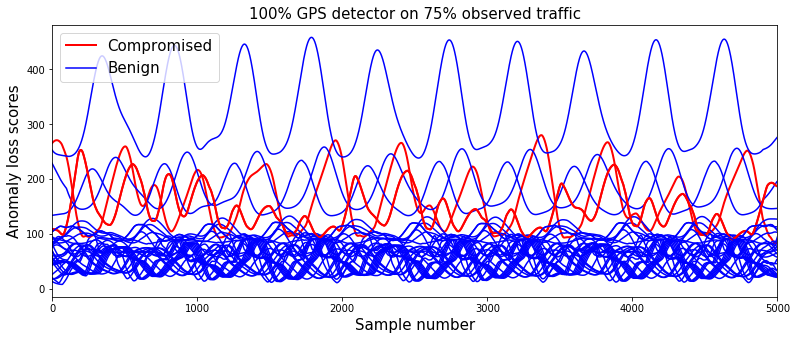

In [69]:
plt.figure(figsize=[13,5])

benign_veh_id = None
mal_veh_id = None

for veh_id in smoothed_losses:
    if('FStop' in veh_id):
        plt.plot(smoothed_losses[veh_id],'r',linewidth=2)
        mal_veh_id = veh_id
    else:
        plt.plot(smoothed_losses[veh_id],'b')
        benign_veh_id = veh_id

print(mal_veh_id)
print(benign_veh_id)
        
fontsize = 15

plt.plot(smoothed_losses[mal_veh_id],'r',linewidth=2,label='Compromised')
plt.plot(smoothed_losses[benign_veh_id],'b',label='Benign')
plt.legend(fontsize=fontsize)
plt.xlim([0,5000])
plt.ylabel('Anomaly loss scores',fontsize=fontsize)
plt.xlabel('Sample number',fontsize=fontsize)
plt.title('100% GPS detector on 75% observed traffic',fontsize=fontsize)

Data loaded.


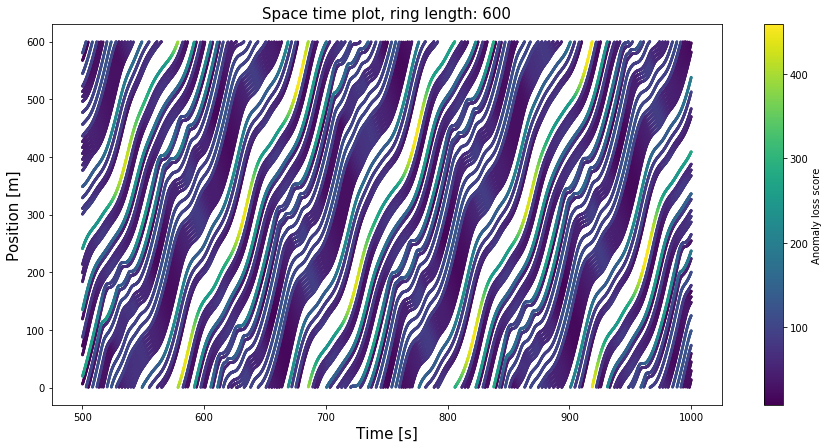

In [76]:
measured_veh_ids = list(smoothed_losses.keys())

csv_path = emission_path

ring_sim_dict = visualize_ring.get_sim_data_dict_ring(csv_path,warmup_period=500)

measured_data_dict = dict.fromkeys(measured_veh_ids)

for veh_id in measured_veh_ids:
    measured_data_dict[veh_id] = ring_sim_dict[veh_id]

#Create the spacetime plot:
visualize_ring.make_ring_spacetime_fig_with_losses(smoothed_losses,
                                                   sim_data_dict=measured_data_dict,
                                                   ring_length=600)

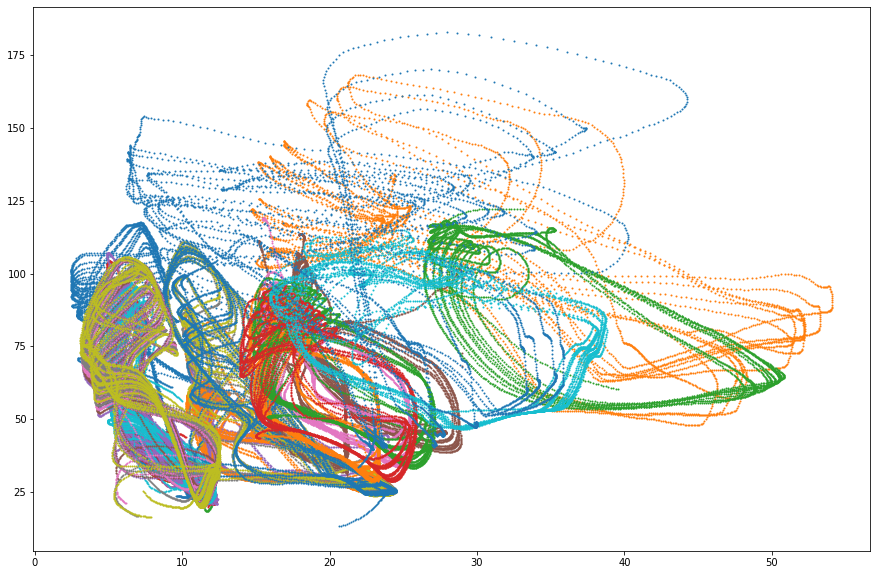

In [60]:
from flow.visualize.visualize_ring import get_measured_leader,get_rel_dist_to_measured_leader,get_vel_of_measured_leader

measured_spacings = dict.fromkeys(measured_veh_ids)
measured_speed_diffs = dict.fromkeys(measured_veh_ids)

for veh_id in measured_veh_ids:
    
    measured_leader = get_measured_leader(ring_sim_dict,veh_id,measured_veh_ids)
    leader_dist = get_rel_dist_to_measured_leader(ring_sim_dict,veh_id,measured_leader)
    leader_vel = get_vel_of_measured_leader(ring_sim_dict,veh_id,measured_leader)
    
    measured_spacings[veh_id]=leader_dist
    measured_speed_diffs = 
    
plt.figure(figsize=[15,10])
for veh_id in measured_veh_ids:
    
    if()
    
    loss = smoothed_losses[veh_id]
    spacing = measured_spacings[veh_id]
    plt.scatter(spacing,loss,s=1.0)

plt.ylabel('Anomaly loss')
plt.xlabel('Spacing [m]')